In [3]:
import numpy as np
import random
import math
from scipy.stats import gamma, poisson
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [1]:
def agent(N, I_0, S_0, gam, R0, tstart, tend, step):
    
    beta = R0 * gam
    vstate = np.zeros(N)
    vstate = vstate.astype('int')
    index_inf = random.sample(range(0,N), k=int(I_0))
    vstate[index_inf] = 1 #infected
    #print(vstate)

    t     = tstart
    S     = S_0
    I     = I_0
    vS    = []  # this will be filled with the number of susceptibles in the population over time
    vI    = []  # this will be filled with the number of infectives in the population over time
    vtime = []  # this will be filled with the time steps
    while t < tend and I  > 0:
        S = len(vstate[vstate==0]) # count the number of susceptibles, based on the state vector 
        I = len(vstate[vstate==1]) # count the number of infectives, based on the state vector
        vS.append(S)
        vI.append(I)
        vtime.append(t)
        delta = step
        recover_prob = 1-math.exp(-gam * delta) # recovery prob it time
        avg_num_infected_people_contacted = beta*I*delta/N
        vnum_infected_people_contacted = np.random.poisson(avg_num_infected_people_contacted,N) # sample Poisson random numbers of infected people contacted by each person
        newvstate = vstate
        vprob = np.random.uniform(size=N)
        newvstate[(vstate==1) & (vprob < recover_prob)] = 2  # number is less than the recovery probability
        newvstate[(vstate==0) & (vnum_infected_people_contacted > 0)] = 1  # If a susceptible contacted at least one infective, they are infected
        vstate = newvstate
        t = t + step
        #print(t)
    final = 0
    if (len(vS)>0):
        final = 1-min(vS)/N

    return vtime, vI,vS, final

In [4]:
N = 1000   # population size
step = 0.1       # nominal time step
tstart  = 0.          # begin day
tend  = 200.         # end day
gam = 1./10         # recovery period of influenza in days^{-1}
R0    = 1.5         # R0 of a hypothetical strain of pandemic influenza
beta = R0*gam     # calculate beta from R0 and gamma
k = 5
I_0 = 10
S_0 = N-I_0
R_0 = 0.     # assume no one has recovered at first
vt=np.arange(tstart,tend + step,step)
inits = S_0, I_0, R_0

In [13]:
def SIRfunc(y, t, N, beta, gam):
    S, I, R = y
    N = S + I + R   
    dS = -beta*S*I/N            
    dI = beta*S*I/N - gam*I  
    dR = gam*I                 
    return dS, dI, dR
   

In [14]:
ret = odeint(SIRfunc, inits, vt, args=(N,beta,gam))
S, I, R = ret.T

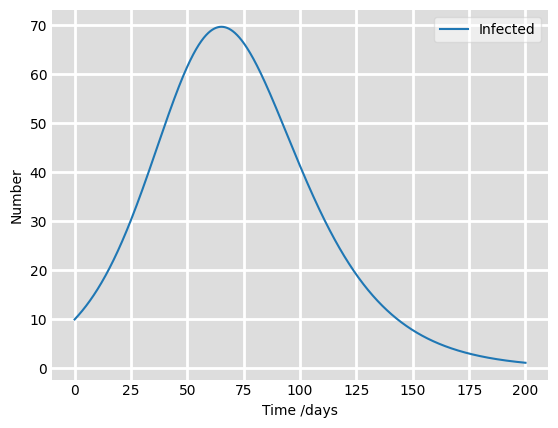

In [18]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(vt, I, label='Infected')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

plt.show()

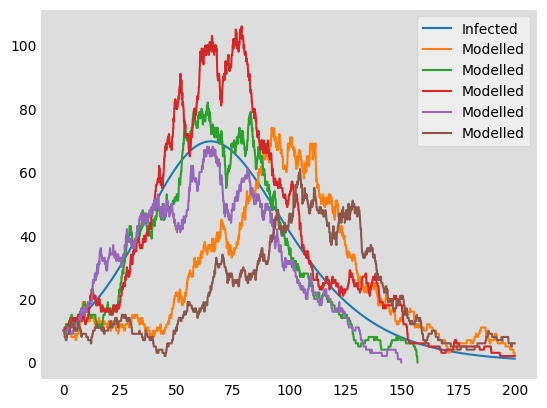

In [23]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(vt, I, label='Infected')
for i in range(0,5):
    myagent = agent(N,I_0,S_0,gam,R0,tstart,tend,step)
    vtime, vI,vS, final = myagent
    ax.plot(vtime, vI,label='Modelled')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)